In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline  
df = pd.read_csv('applemobilitytrends.csv')

In [2]:
df

,geo_type,region,transportation_type,alternative_name,1/13/2020,1/14/2020,1/15/2020,1/16/2020,1/17/2020,1/18/2020,...,4/23/2020,4/24/2020,4/25/2020,4/26/2020,4/27/2020,4/28/2020,4/29/2020,4/30/2020,5/1/2020,5/2/2020
0,country/region,Albania,driving,NaN,100.0,95.30,101.43,97.20,103.55,112.67,...,33.94,30.22,25.22,30.39,37.39,36.69,35.90,38.09,37.23,29.36
1,country/region,Albania,walking,NaN,100.0,100.68,98.93,98.46,100.85,100.13,...,34.80,34.63,29.00,35.22,41.83,37.53,41.49,38.25,38.68,32.28
2,country/region,Argentina,driving,NaN,100.0,97.07,102.45,111.21,118.45,124.01,...,28.73,30.99,25.92,16.57,27.45,27.12,32.22,34.45,22.69,28.23
3,country/region,Argentina,walking,NaN,100.0,95.11,101.37,112.67,116.72,114.14,...,20.39,22.32,23.31,16.36,18.48,17.49,22.78,24.80,16.62,20.61
4,country/region,Australia,driving,NaN,100.0,102.98,104.21,108.63,109.08,89.00,...,62.87,47.84,41.89,55.39,59.09,59.46,59.46,63.12,58.40,48.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1153,sub-region,Île-de-France Region,driving,NaN,100.0,102.06,103.61,110.01,107.47,113.34,...,20.81,19.81,17.59,17.29,20.81,25.32,23.99,23.14,19.34,21.01
1154,sub-region,Örebro County,driving,Örebro län,100.0,101.70,105.33,108.03,115.57,123.96,...,107.07,120.65,116.40,114.68,103.28,107.91,109.64,127.04,115.35,122.53
1155,sub-region,Östergötland County,driving,NaN,100.0,96.87,98.81,103.48,109.64,113.50,...,106.38,114.71,117.23,108.38,106.47,102.50,110.64,126.09,106.03,112.27
1156,sub-region,Ústí nad Labem Region,driving,Ústecký kraj,100.0,101.57,107.63,112.87,120.32,126.19,...,108.22,107.30,107.54,119.49,105.89,107.77,101.99,101.86,119.88,107.27


In [3]:
import matplotlib.dates as dates

In [4]:
def createRegionGraph():
    idx = pd.date_range('2020-01-13','2020-05-02')
    region = input('Enter the name of the city/region you would like to mobility timeline info for: ')
    i = 0
    fig, ax = plt.subplots()
    ax.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(6),
                                                interval=1))
    ax.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
    ax.xaxis.grid(True, which="minor")
    ax.yaxis.grid()
    plt.ylabel('Relative Mobility')
    ax.xaxis.set_major_locator(dates.MonthLocator())
    ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
    plt.tight_layout()
    while i < len(df.loc[df['region']== region].iloc[:,4:]):
        value = df.loc[df['region']==region].iloc[i,4:]
        valueInts = [float(x) for x in value[0:]]
        datedf = pd.DataFrame({'data':valueInts},index=idx.to_pydatetime())
        res = seasonal_decompose(datedf).trend
        ax.plot(res,label=df.loc[df['region']==region].iloc[i,2])
        i=i+1
    fig.suptitle(region + ' Mobility Trends',y=1.05)    
    plt.legend()
    plt.show()        

Enter the name of the city/region you would like to mobility timeline info for: Boston


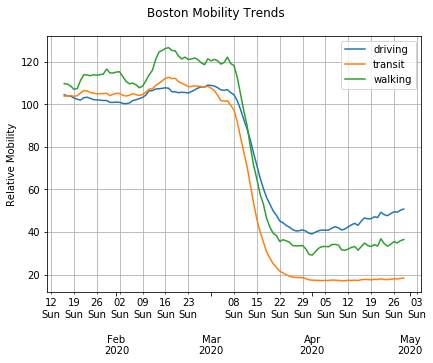

In [5]:
createRegionGraph()


In [6]:
def comparativeRegionGraph():
    idx = pd.date_range('2020-01-13','2020-05-02')
    mobilityType = input('Enter the mobility data type you\'d like to compare (type: driving, transit, or walking)')
    stop = False
    regionArray=[]
    while stop == False:
        region = input('Enter a region/city you\'d like to see graphed (type \'stop\' when you have all the locations you want to see): ')
        if region == 'stop':
            break
        regionArray.append(region)
    fig, ax = plt.subplots()
    ax.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(6),
                                                interval=1))
    ax.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
    ax.xaxis.grid(True, which="minor")
    ax.yaxis.grid()
    plt.ylabel(mobilityType + ' mobility')
    ax.xaxis.set_major_locator(dates.MonthLocator())
    ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
    plt.tight_layout()
    for regions in regionArray:
        value = df.loc[(df['transportation_type']==mobilityType) & (df['region']==regions)].iloc[0,4:]
        valueInts= [float(x) for x in value[0:]]
        datedf = pd.DataFrame({'data':valueInts},index=idx.to_pydatetime())
        res = seasonal_decompose(datedf).trend
        ax.plot(res,label=regions)
    fig.suptitle('Comparative Mobility Trends',y=1.05) 
    plt.legend()

Enter the mobility data type you'd like to compare (type: driving, transit, or walking)driving
Enter a region/city you'd like to see graphed (type 'stop' when you have all the locations you want to see): Detroit
Enter a region/city you'd like to see graphed (type 'stop' when you have all the locations you want to see): Michigan
Enter a region/city you'd like to see graphed (type 'stop' when you have all the locations you want to see): stop


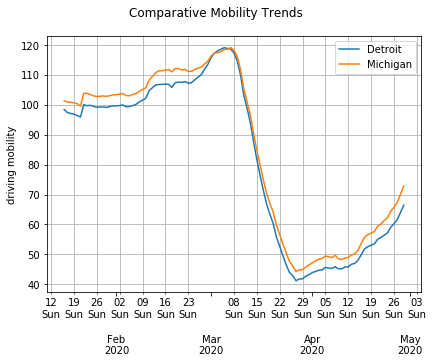

In [13]:
comparativeRegionGraph()